<a href="https://colab.research.google.com/github/keinam53/Deep_learning/blob/main/1_Wprowadzenie/6_Metryki_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Metryki - Problem regresji:
1. [Import bibliotek](#a0)
1. [Interpretacja graficzna](#a2)
2. [Mean Absolute Error - MAE](#a3)
3. [Mean Squared Error - MSE](#a4)
4. [Root Mean Squared Error - RMSE](#a5)
5. [Max Error](#a6)
6. [R2 score - współczynnik determinacji](#a7)

### <a name='a0'></a> 1. Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### <a name='a2'></a> 2 Interpretacja graficzna

In [2]:
y_true = 100 + 20 * np.random.randn(50)
y_true[:20]

array([ 97.4833426 ,  79.84316052, 100.01864009,  61.92882911,
        91.94803274, 106.13914475,  92.35468684,  75.50993971,
        85.48057813,  82.80534431, 129.06336163,  93.68524109,
        80.8120152 , 102.09942843,  87.39270382, 112.59539639,
        90.7893628 ,  61.8748717 , 126.66645652, 110.80474141])

In [3]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred[:20]

array([ 99.25477077,  73.82320807, 108.65033658,  49.61337602,
        90.61900863,  96.19875324,  88.82940876,  86.65276119,
        57.51081715,  73.10743014, 134.97003966,  97.2461958 ,
        95.66527523,  97.85675424,  84.96627722, 101.141639  ,
        91.08173644,  69.37728038, 115.82097459, 127.52476619])

In [4]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results.head()

,y_true,y_pred
0,97.483343,99.254771
1,79.843161,73.823208
2,100.018640,108.650337
3,61.928829,49.613376
4,91.948033,90.619009


In [5]:
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,97.483343,99.254771,-1.771428
1,79.843161,73.823208,6.019952
2,100.018640,108.650337,-8.631696
3,61.928829,49.613376,12.315453
4,91.948033,90.619009,1.329024


In [6]:
def plot_regression_results(y_true, y_pred): 
    min = results[['y_true', 'y_pred']].min().min()
    max = results[['y_true', 'y_pred']].max().max()

    fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                    go.Scatter(x=[min, max], y=[min, max])],
                    layout=go.Layout(showlegend=False, width=800,
                                     xaxis_title='y_true', 
                                     yaxis_title='y_pred',
                                     title='Regression results'))
    fig.show()
plot_regression_results(y_true, y_pred)

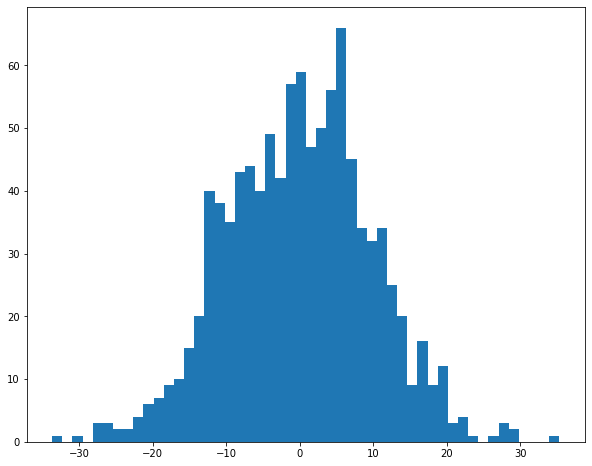

In [7]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

plt.figure(figsize=(10, 8))
_ = plt.hist(x=results['error'], bins=50)

### <a name='a3'></a> 2.2 Mean Absolute Error
### $$MAE = \frac{1}{n}\sum_{i=1}^{N}|y_{true} - y_{pred}|$$

In [9]:
from tensorflow.keras.metrics import mean_absolute_error

mean_absolute_error(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=7.8885505607780235>

### <a name='a4'></a> 2.3 Mean Squared Error
### $$MSE = \frac{1}{n}\sum_{i=1}^{N}(y_{true} - y_{pred})^{2}$$

In [10]:
from tensorflow.keras.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=96.78496618259257>

### <a name='a5'></a> 2.4 Root Mean Squared Error
### $$RMSE = \sqrt{MSE}$$

In [11]:
np.sqrt(mean_squared_error(y_true, y_pred))

9.837935056839548

### <a name='a6'></a> 2.5 Max Error

In [12]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

35.332116925073564

### <a name='a7'></a> 2.6 R2 score - współczynnik determinacji
### $$R2\_score = 1 - \frac{\sum_{i=1}^{N}(y_{true} - y_{pred})^{2}}{\sum_{i=1}^{N}(y_{true} - \overline{y_{true}})^{2}}$$

In [13]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7505406503545788